In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#membaca dataset dari spreadsheet
sheet_url = "https://docs.google.com/spreadsheets/d/1zNU8E49P6MCkt8g_-jL3jcgvT66VA4bjTjGmtkk1oQ8/edit?gid=1606655556#gid=1606655556"
sheet_url_trf = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1zNU8E49P6MCkt8g_-jL3jcgvT66VA4bjTjGmtkk1oQ8/export?format=csv&gid=1606655556#gid=1606655556


,Sales,Advertising
0,12.0,15
1,20.5,16
2,21.0,18
3,15.5,27
4,15.3,21


In [5]:
# Membagi data menjadi fitur (X) dan target (y)
X = df[['Sales']]
y = df['Advertising']

In [6]:
# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
# Memprediksi biaya iklan untuk target penjualan 50, 100, 150
sales_targets = pd.DataFrame({'Sales': [50, 100, 150]})
predictions = model.predict(sales_targets)

In [8]:
# Menghitung RMSE dan R2 score
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

In [9]:
# Menampilkan hasil prediksi dan evaluasi
print(f"Prediksi biaya iklan untuk 50 sales: {predictions[0]:.2f} million $")
print(f"Prediksi biaya iklan untuk 100 sales: {predictions[1]:.2f} million $")
print(f"Prediksi biaya iklan untuk 150 sales: {predictions[2]:.2f} million $")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")

Prediksi biaya iklan untuk 50 sales: 77.83 million $
Prediksi biaya iklan untuk 100 sales: 173.58 million $
Prediksi biaya iklan untuk 150 sales: 269.32 million $
RMSE: 14.37
R2 score: 0.40


**Prediksi Biaya Iklan**
*   Untuk mencapai 50 penjualan, model memprediksi bahwa perusahaan perlu mengeluarkan biaya iklan sekitar 77.83 juta USD.
*   Untuk mencapai 100 penjualan, model memprediksi bahwa perusahaan perlu mengeluarkan biaya iklan sekitar 173.58 juta USD.
*   Untuk mencapai 150 penjualan, model memprediksi bahwa perusahaan perlu mengeluarkan biaya iklan sekitar 269.32 juta USD.

**Root Mean Square Error (RMSE)**

Nilai RMSE 14.37 berarti bahwa, secara rata-rata, prediksi biaya iklan meleset sekitar 14.37 juta USD dari nilai aktualnya. Semakin rendah nilai RMSE, semakin baik model dalam melakukan prediksi. Dalam konteks ini, meskipun model memiliki beberapa tingkat kesalahan, prediksinya masih cukup informatif.

**R-Squared(R2) Score**

Nilai R2 sebesar 0.40 menunjukkan bahwa model ini dapat menjelaskan 40% dari variabilitas biaya iklan berdasarkan penjualan. Ini menunjukkan bahwa ada variabel lain yang juga mempengaruhi biaya iklan yang tidak dimasukkan dalam model ini. Meskipun R2 tidak terlalu tinggi, model ini masih memberikan wawasan yang berharga mengenai hubungan antara penjualan dan biaya iklan.

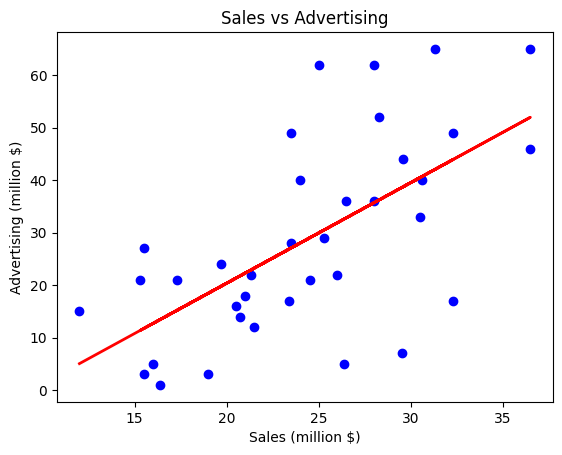

In [10]:
# Visualisasi hasil regresi
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Sales (million $)')
plt.ylabel('Advertising (million $)')
plt.title('Sales vs Advertising')
plt.show()